In [11]:
# Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Loading datasets

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv")

In [15]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [16]:
df.shape

(30, 17)

In [17]:
# Checking null values in dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [19]:
# Null count for every column in dataset is zero

In [20]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [21]:
# So each and every column in a dataset has no null values

In [22]:
df.duplicated().sum()

0

In [23]:
# duplicated values are not present in a datasets

In [24]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [25]:
# As we can see that the dataset seems to be imbalanced 

In [26]:
# Univariate Analysis

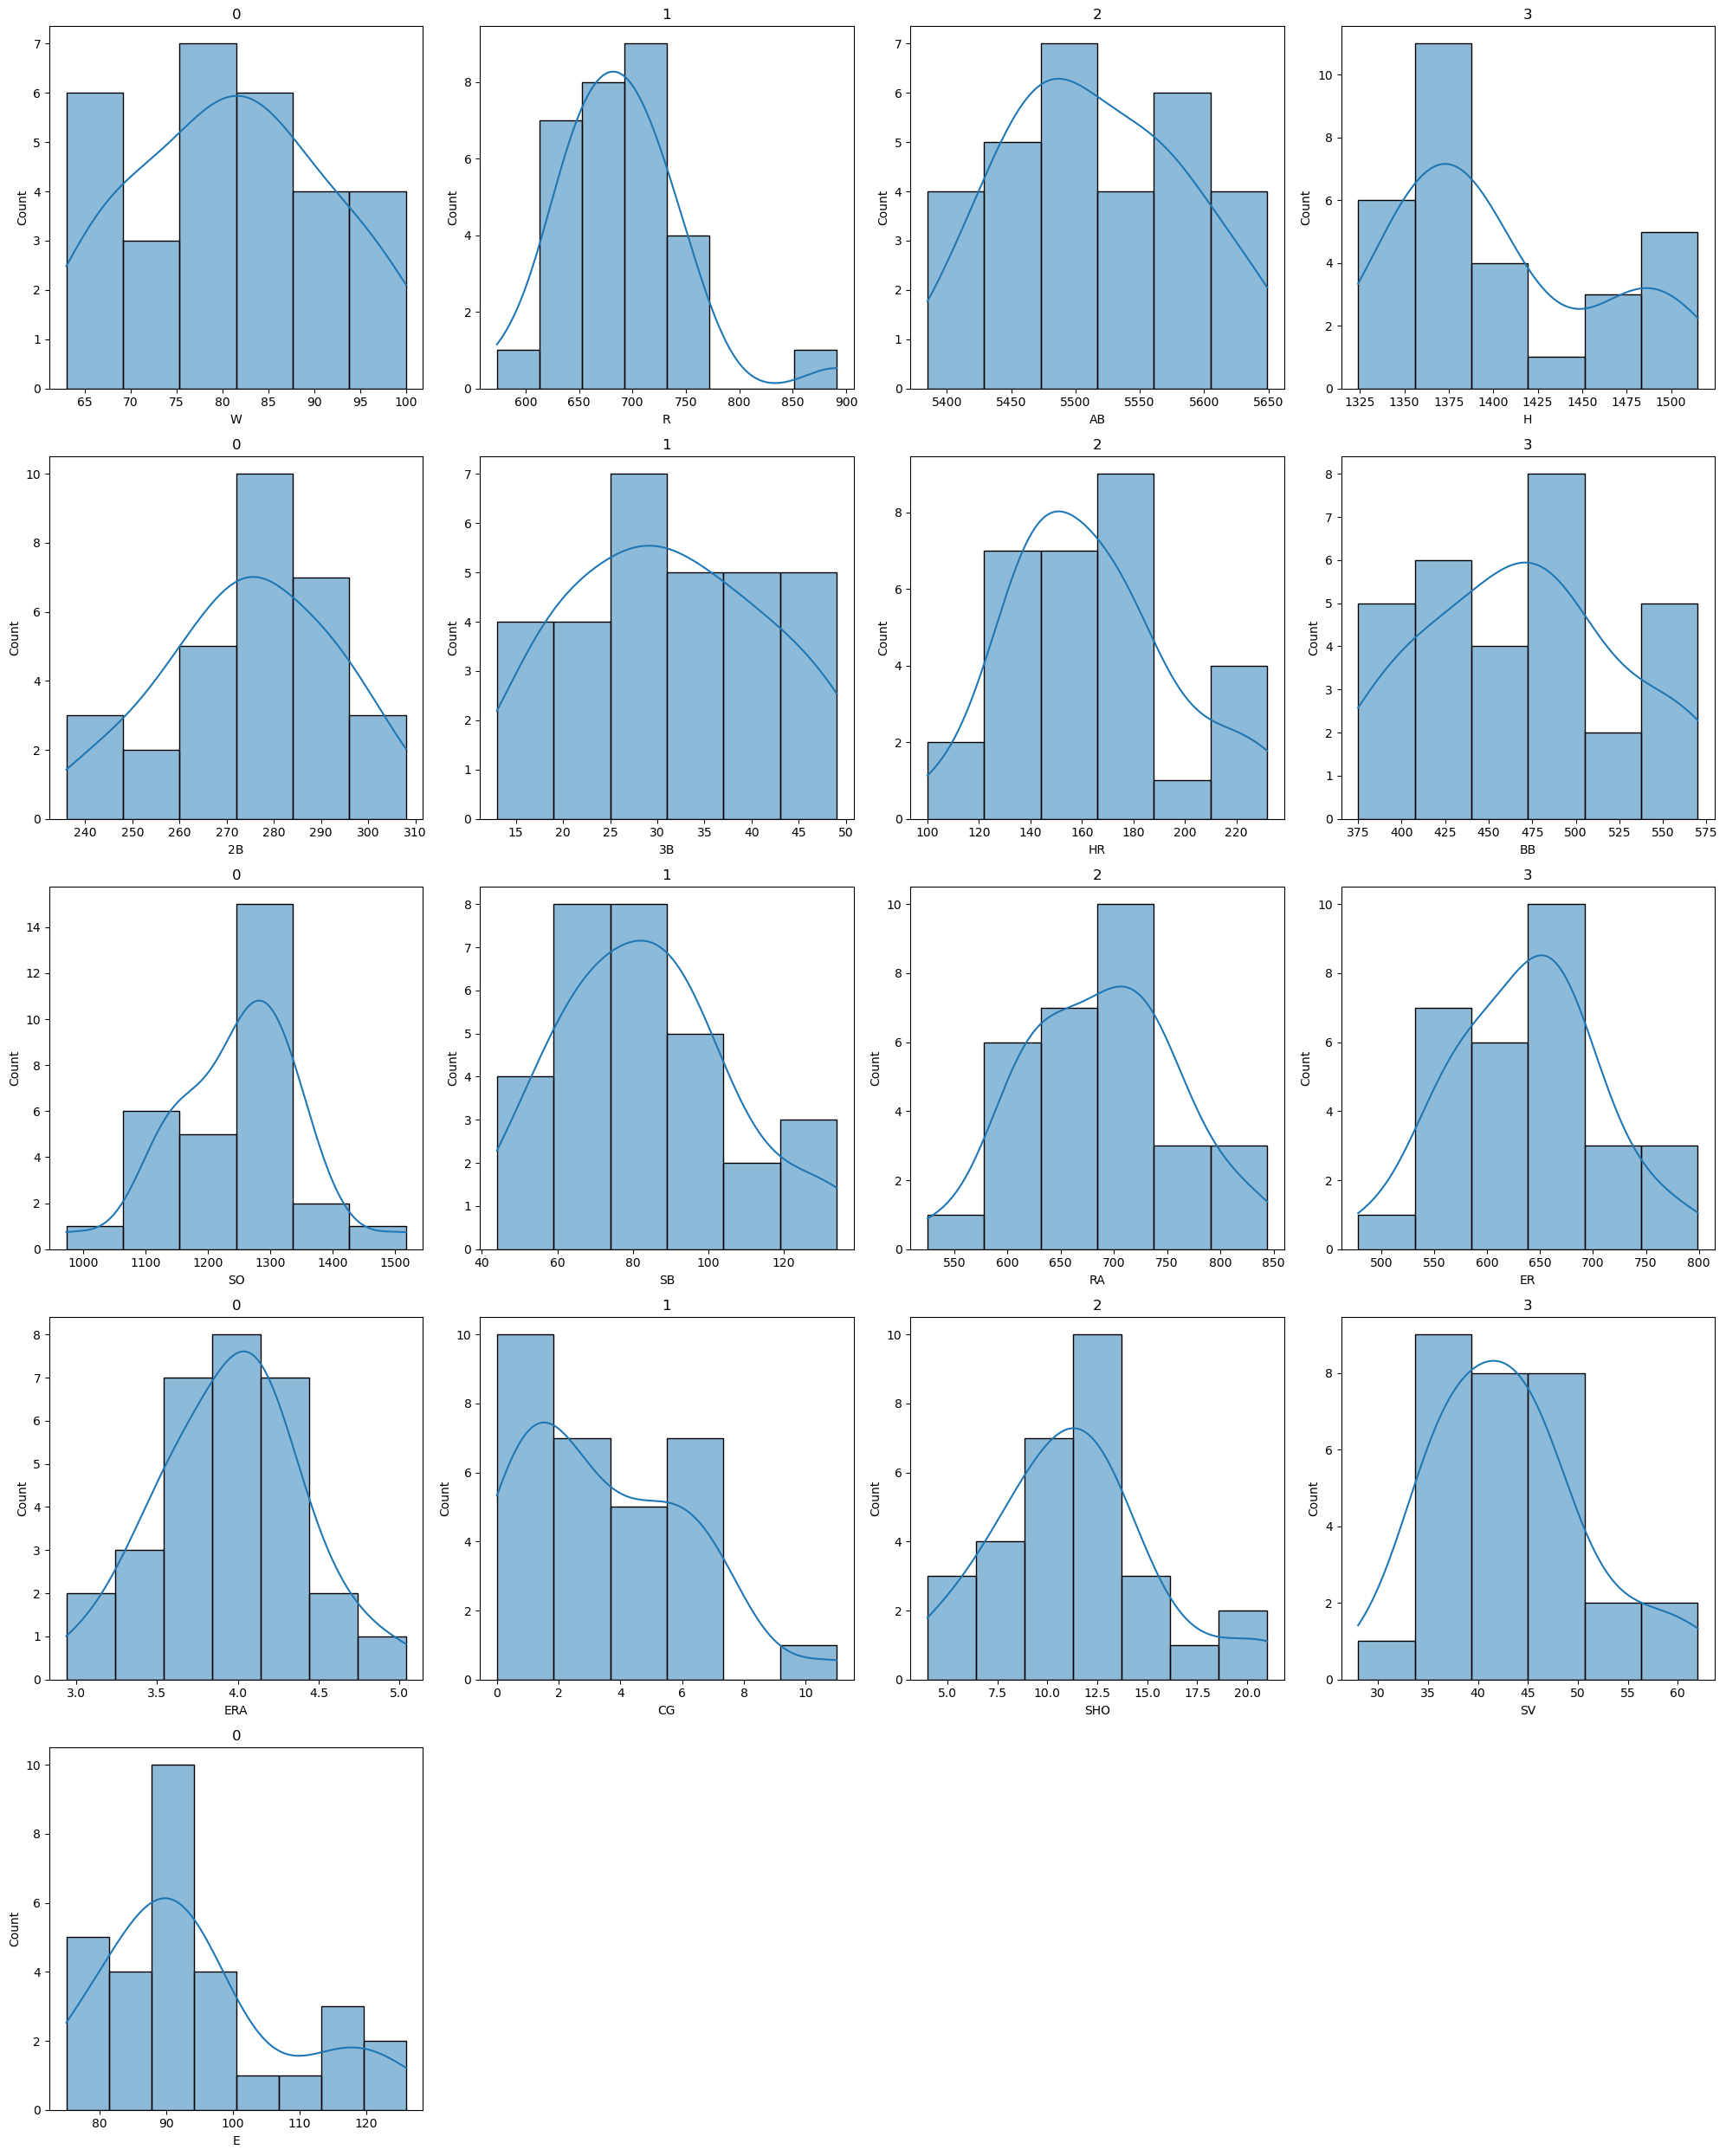

In [27]:
num_features = df.shape[1]
num_cols = 4
num_rows = (num_features + num_cols-1)//num_cols
fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (5*num_cols, 5*num_rows))
for i , col in enumerate(df.columns):
    row = i//num_cols
    col = i%num_cols
    sns.histplot(df[df.columns[i]], kde = True, ax = axes[row, col])
    axes[row, col].set_title(col)
for j in range(num_features, num_rows*num_cols):
    axes.flat[j].axis('off')
plt.tight_layout()
plt.show()

In [29]:
# As we can see that there are no outliers in the dataset

In [30]:
skewness = df.skew()
print(skewness)

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64


In [31]:
# Here as we can say that two columns have negative values i.e. '2B' and 'SO' which means that they are left skewed

In [32]:
# AND also other than two columns all are somewhat or the other positively skewed and column name 'R' is highly skewed positive compared to the other features in our dataset

In [33]:
#There are skewness values which are close to zero which indicated symmetricity in the distribution of data i.e 'W', 'AB' '3B', 'BB', 'RA', 'ER' and ERA

In [34]:
# BIVARIATE ANALYSIS

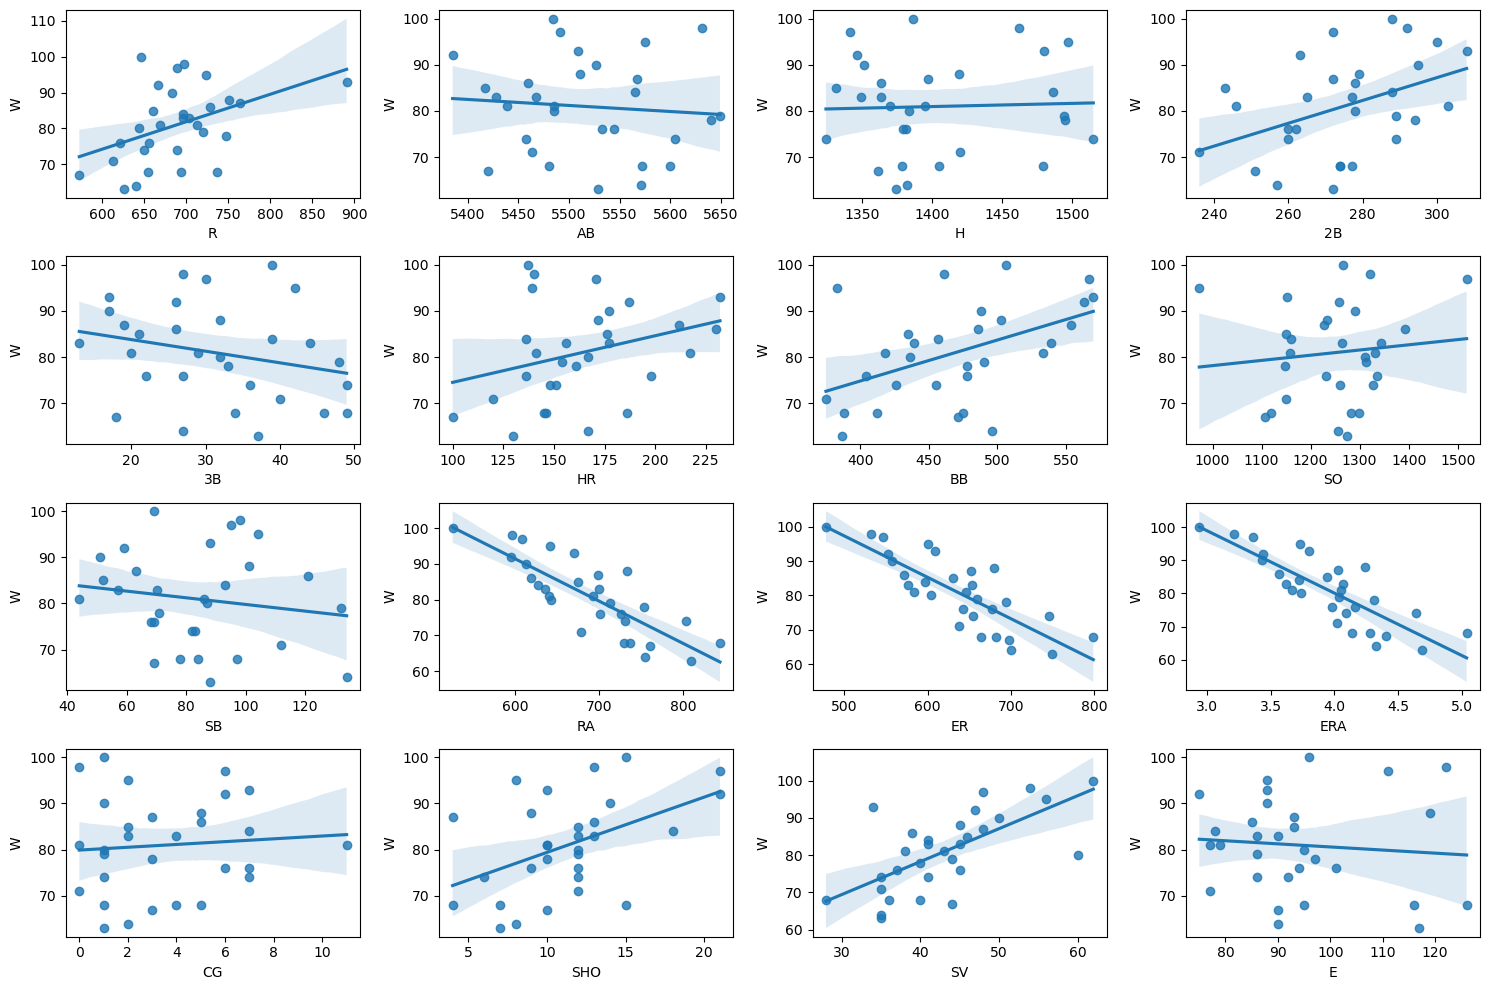

In [35]:
plt.figure(figsize = (15, 10))
for i , column in enumerate(df.columns):
    if column != 'W':
        plt.subplot(4, 4, i)
        sns.regplot(x = column, y = df['W'], data = df)
plt.tight_layout()
plt.show()        

In [36]:
# As we can see that  feature 'R' , 'SHO' , 'SV' ,'BB' '2B' are  correlated with target variable 'W'

In [37]:
# And others are likely correlated with each other

In [38]:
# And dataset has too much randomness 

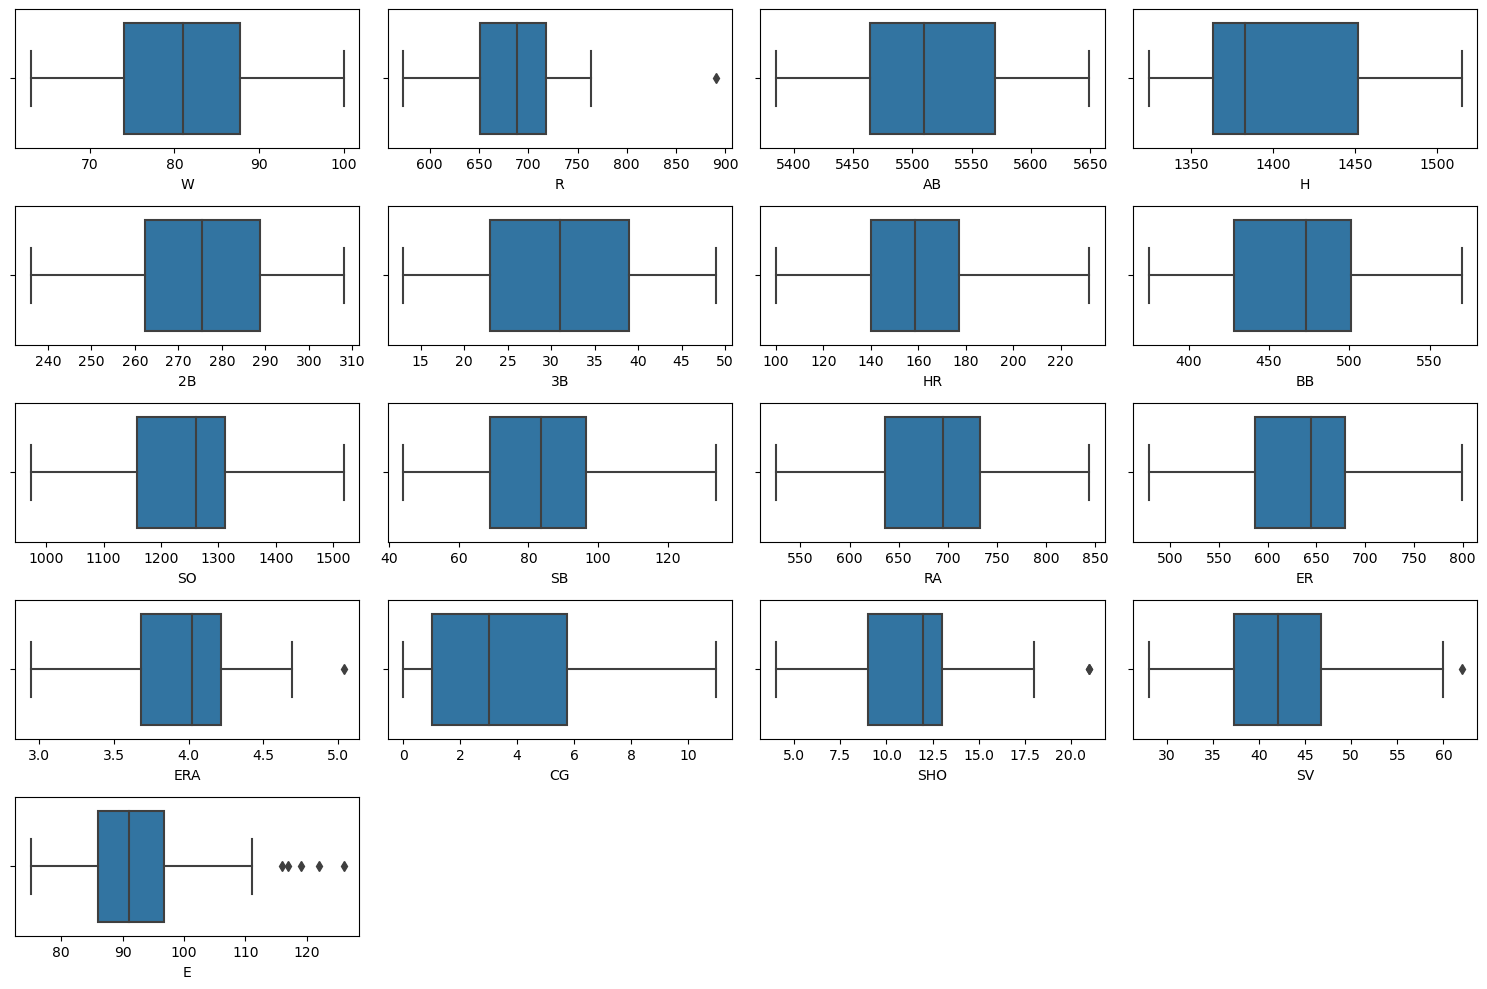

In [39]:
plt.figure(figsize = (15, 10))
for i , column in enumerate(df.columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x = column, data = df)
plt.tight_layout()
plt.show()

In [40]:
# And features 'R' , 'SHO', 'SV' and 'E' have outliers

In [41]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [42]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [43]:
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis = 1)

In [44]:
cleaned_df = df[~outliers]

In [45]:
outliers.sum()

10

In [46]:
# 10 outliers are present in the dataset which have been removed

In [47]:
cleaned_df.shape

(20, 17)

In [48]:
cleaned_df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,79.700000,679.650000,5514.800000,1401.800000,272.150000,30.10000,163.150000,462.050000,1236.100000,82.400000,690.050000,639.150000,3.977500,3.400000,10.850000,43.150000,88.250000
std,7.554016,48.117482,72.624195,60.859286,20.005986,10.90099,32.817317,49.007491,102.538773,26.515934,53.907792,49.631564,0.308014,2.909151,3.013566,6.651276,6.711145
min,64.000000,573.000000,5417.000000,1324.000000,236.000000,13.00000,100.000000,375.000000,973.000000,44.000000,613.000000,557.000000,3.430000,0.000000,4.000000,35.000000,77.000000
25%,75.500000,648.500000,5458.500000,1362.500000,259.250000,20.75000,140.500000,432.750000,1155.250000,66.750000,640.750000,600.000000,3.727500,1.000000,9.750000,38.750000,85.750000
50%,80.500000,686.000000,5506.000000,1381.500000,274.500000,28.00000,158.500000,464.000000,1257.000000,76.500000,695.500000,644.500000,4.025000,2.500000,12.000000,42.000000,89.000000
75%,84.250000,714.750000,5568.000000,1436.500000,289.000000,39.25000,177.000000,488.500000,1315.750000,95.750000,727.250000,663.500000,4.107500,5.250000,12.000000,45.250000,93.000000
max,95.000000,764.000000,5649.000000,1515.000000,303.000000,49.00000,230.000000,554.000000,1392.000000,134.000000,803.000000,746.000000,4.640000,11.000000,18.000000,60.000000,101.000000


In [76]:
cleaned_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [49]:
# As our data is not evenly distributed so we use standarization method to normalize the data

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(cleaned_df)

In [87]:
data = pd.DataFrame(data, columns = cleaned_df.columns)

In [88]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,2.078030,0.945647,0.850459,1.604901,1.428247,1.120003,-0.755009,-1.654922,-2.632515,0.835767,-0.933524,-0.788633,-0.824411,-0.493742,-0.970292,1.982149,-0.038219
1,0.448202,0.348621,-0.675281,-0.890113,0.248725,1.308239,-0.223533,-0.482555,0.279161,-0.479792,0.189369,0.286306,0.308113,-0.493742,0.391521,0.285368,-0.343973
2,0.176565,-0.227083,-1.070844,-0.114636,1.582098,-0.103530,-0.692483,1.485348,-0.791456,0.139294,-0.952556,-1.140055,-1.024268,2.680313,-0.289385,-0.794402,-1.414110
3,-0.502530,-1.229234,0.257115,-0.350651,-0.623095,-0.291766,-0.848799,-1.215284,-0.051029,-0.557178,0.208401,0.079587,0.008327,1.269622,-0.629839,-0.948655,1.949179
4,-0.774168,0.199364,1.274276,1.908349,0.864128,1.778828,-0.379849,-0.147593,0.229132,0.023216,2.149675,2.208792,2.206755,1.269622,0.391521,-1.257161,-0.343973


In [53]:
coorelation_matrix = cleaned_df.corr()

In [54]:
coorelation_matrix

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.664613,0.027707,0.078970,0.501117,-0.060975,0.386591,0.054778,-0.112958,-0.259240,-0.707841,-0.684375,-0.707450,0.000958,0.157447,0.572890,-0.082535
R,0.664613,1.000000,0.469861,0.385690,0.535319,0.114559,0.594316,0.351671,0.121402,-0.025584,-0.212049,-0.187813,-0.227161,-0.007971,-0.048655,0.169558,-0.088541
AB,0.027707,0.469861,1.000000,0.781273,0.494489,0.464465,0.027794,0.069801,-0.091785,0.330095,0.348298,0.393995,0.317000,0.018335,-0.061948,-0.013010,0.163275
H,0.078970,0.385690,0.781273,1.000000,0.545859,0.651514,-0.278711,-0.084576,-0.406969,0.401832,0.203982,0.277340,0.249744,0.198161,0.161967,-0.073774,-0.181437
2B,0.501117,0.535319,0.494489,0.545859,1.000000,0.367722,-0.031140,0.315531,-0.148303,0.176088,-0.239770,-0.250479,-0.293325,0.393197,0.164514,0.249403,-0.042630
3B,-0.060975,0.114559,0.464465,0.651514,0.367722,1.000000,-0.419930,-0.427679,-0.213592,0.557762,0.242080,0.295701,0.278939,0.003651,0.119039,-0.101118,-0.257193
HR,0.386591,0.594316,0.027794,-0.278711,-0.031140,-0.419930,1.000000,0.364324,0.624167,-0.189567,-0.225423,-0.213640,-0.250566,-0.107611,-0.066284,0.143601,0.055023
BB,0.054778,0.351671,0.069801,-0.084576,0.315531,-0.427679,0.364324,1.000000,0.313191,-0.063280,-0.042415,-0.093157,-0.113309,0.356094,-0.051977,-0.101424,0.081413
SO,-0.112958,0.121402,-0.091785,-0.406969,-0.148303,-0.213592,0.624167,0.313191,1.000000,-0.046822,-0.020129,-0.071031,-0.102361,-0.081832,0.141591,-0.131985,0.061607
SB,-0.259240,-0.025584,0.330095,0.401832,0.176088,0.557762,-0.189567,-0.063280,-0.046822,1.000000,0.029920,0.068020,0.046978,-0.014465,0.027137,-0.220894,-0.235427


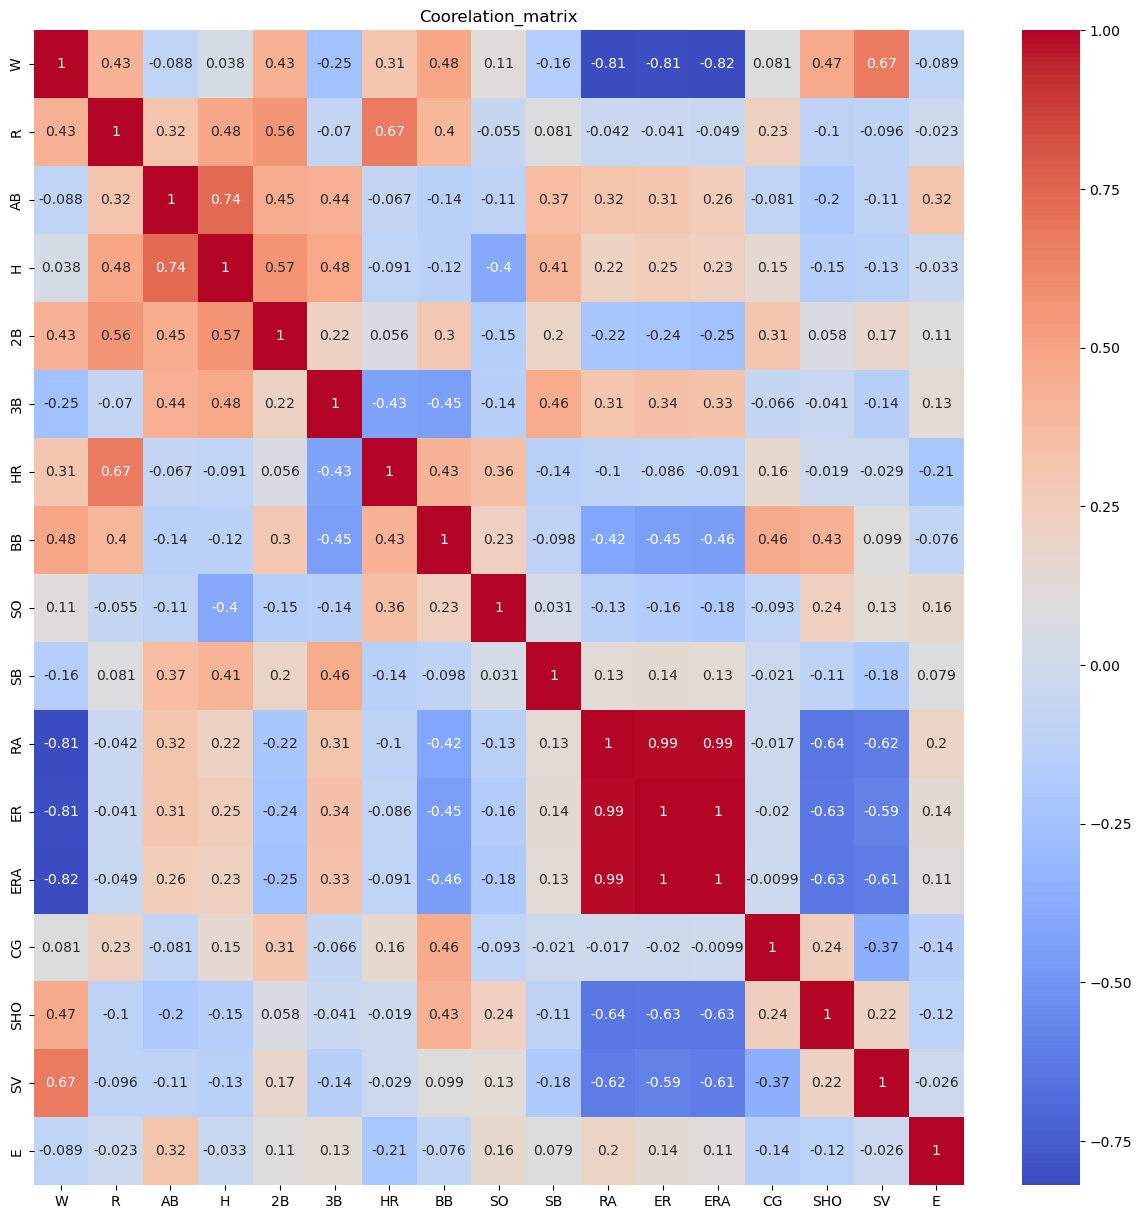

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Coorelation_matrix')
plt.show()

In [64]:
# As we can see that we find no coorelation between featuresi.e. 'ERA', 'ER' and 'RA' with our target variable 'W'

In [89]:
data.drop(['ERA', 'ER', 'RA'], axis=1, inplace=True)

In [91]:
data.shape

(20, 14)

In [93]:
data.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,2.078030,0.945647,0.850459,1.604901,1.428247,1.120003,-0.755009,-1.654922,-2.632515,0.835767,-0.493742,-0.970292,1.982149,-0.038219
1,0.448202,0.348621,-0.675281,-0.890113,0.248725,1.308239,-0.223533,-0.482555,0.279161,-0.479792,-0.493742,0.391521,0.285368,-0.343973
2,0.176565,-0.227083,-1.070844,-0.114636,1.582098,-0.103530,-0.692483,1.485348,-0.791456,0.139294,2.680313,-0.289385,-0.794402,-1.414110
3,-0.502530,-1.229234,0.257115,-0.350651,-0.623095,-0.291766,-0.848799,-1.215284,-0.051029,-0.557178,1.269622,-0.629839,-0.948655,1.949179
4,-0.774168,0.199364,1.274276,1.908349,0.864128,1.778828,-0.379849,-0.147593,0.229132,0.023216,1.269622,0.391521,-1.257161,-0.343973


In [68]:
# Feature 'SV' is highly coorelated with 'W'

In [69]:
# Feature 'H' and 'AB' also 'R' and 'HR' are highly coorelated to each other so we can drop one column to avoid multicollinearity in our dataset

In [94]:
data.drop(['H', 'HR'], axis=1, inplace=True)

In [95]:
data.shape

(20, 12)

In [96]:
data.head(5)

,W,R,AB,2B,3B,BB,SO,SB,CG,SHO,SV,E
0,2.078030,0.945647,0.850459,1.428247,1.120003,-1.654922,-2.632515,0.835767,-0.493742,-0.970292,1.982149,-0.038219
1,0.448202,0.348621,-0.675281,0.248725,1.308239,-0.482555,0.279161,-0.479792,-0.493742,0.391521,0.285368,-0.343973
2,0.176565,-0.227083,-1.070844,1.582098,-0.103530,1.485348,-0.791456,0.139294,2.680313,-0.289385,-0.794402,-1.414110
3,-0.502530,-1.229234,0.257115,-0.623095,-0.291766,-1.215284,-0.051029,-0.557178,1.269622,-0.629839,-0.948655,1.949179
4,-0.774168,0.199364,1.274276,0.864128,1.778828,-0.147593,0.229132,0.023216,1.269622,0.391521,-1.257161,-0.343973


In [97]:
x = data.drop('W', axis=1)

In [98]:
y = data['W']

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [101]:
models  ={'LinearRegression':LinearRegression(),
         'RandomForestRegressor':RandomForestRegressor(random_state = 42),
         'DecisionTreeRegressor':DecisionTreeRegressor(random_state = 42),
         'SupportVectorRegressor':SVR(),
         'XGBRegressor':XGBRegressor()}

In [102]:
for name , model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")

Model: LinearRegression
Mean Squared Error: 0.36250989911538606
Mean Absolute Error: 0.5180976009520994
R2 Score: 0.7277691895266483
Model: RandomForestRegressor
Mean Squared Error: 1.4771052388858141
Mean Absolute Error: 0.8689015879619575
R2 Score: -0.1092484848484847
Model: DecisionTreeRegressor
Mean Squared Error: 1.5587529976019183
Mean Absolute Error: 1.086551419100533
R2 Score: -0.17056277056277036
Model: SupportVectorRegressor
Mean Squared Error: 1.4723680780362396
Mean Absolute Error: 1.029574196567098
R2 Score: -0.10569106161516251
Model: XGBRegressor
Mean Squared Error: 1.6596775853815062
Mean Absolute Error: 1.0802602442310327
R2 Score: -0.2463532038584444


In [103]:
# Linear regression model is the best model performing on datasets

In [104]:
# Ridge regression model 

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = {'alpha': [0.001, 0.01,0.1, 1, 10, 100]}
ridge = Ridge()
gridsearch = GridSearchCV(ridge, param_grid, cv=5)
gridsearch.fit(x_train, y_train)
best_alpha = gridsearch.best_params_['alpha']
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(x_train, y_train)
y_pred = best_ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Evaluation metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Evaluation metrics:
Mean Squared Error: 1.202481450779437
Mean Absolute Error: 0.7935984249452822
R2 Score: 0.09698328039129656


In [106]:
# Lasso regression model 

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
param_grid = {'alpha': [0.001, 0.01,0.1, 1, 10, 100]}
lasso = Lasso()
gridsearch = GridSearchCV(ridge, param_grid, cv=5)
gridsearch.fit(x_train, y_train)
best_alpha = gridsearch.best_params_['alpha']
best_lasso = Ridge(alpha=best_alpha)
best_lasso.fit(x_train, y_train)
y_pred = best_lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Evaluation metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Evaluation metrics:
Mean Squared Error: 1.202481450779437
Mean Absolute Error: 0.7935984249452822
R2 Score: 0.09698328039129656


In [108]:
# Hyper parameter tuning of the linear regression model

In [109]:
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept': [True, False],
             'copy_X': [True, False],
             'n_jobs':[None,1,-1]}
linear_regression = LinearRegression()
gridsearch = GridSearchCV(estimator=linear_regression, param_grid=param_grid, cv=5)
gridsearch.fit(x_train, y_train)
best_params= gridsearch.best_params_
best_linear_regression = LinearRegression(**best_params)
best_linear_regression.fit(x_train, y_train)
y_pred = best_linear_regression.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Evaluation metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Evaluation metrics:
Mean Squared Error: 0.11403161006793411
Mean Absolute Error: 0.26329960741866737
R2 Score: 0.9143667036289841


In [110]:
# Final Evaluation metrics of the linear regression model

In [113]:
# Now we will save the best model

In [111]:
import pickle

In [112]:
with open('BaseballCasestudy.pkl', 'wb') as f:
    pickle.dump(best_linear_regression, f)

In [114]:
# The Model has been saved successfully in a BaseballCasestudy.pkl file